<span style="font-size: 250%; color: black;">レコメンドシステム</span>

----

# 目的
ユーザーベースの協調フィルタリングにより、アニメのレコメンドシステムを構築

# 使用データ（Anime Recommend Japanese Tutorial）
- myanimelist.netの76,000ユーザーのアニメのレビューデータ
- 「anime.csv」と「ratings.csv」の2個のCSVファイルにより構成
- Anime.csv
  - anime_id – アニメを識別するmyanimelist.netのユニークなID。
  - name – アニメのフルネーム。
  - ganre – このアニメのジャンルのカンマ区切りのリスト。
  - type – 映画、テレビ、OVAなど 
  - episodes – この番組のエピソード数 （映画の場合は1）
  - rating – このアニメの10の平均評価
  - menbers – このアニメの「グループ」に含まれるコミュニティメンバーの数。
- Rating.csv
  - user_id – 識別不可能なランダムに生成されたユーザーID。
  - anime_id – このユーザーが評価したアニメ。
  - rating – このユーザーが割り当てた10のうちの評価（ユーザーがそれを見たが評価を割り当てなかった場合は-1）

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# ユーザー評価の情報
df_user = pd.read_csv("dataset/rating.csv", encoding='utf_8_sig')
df_user.rename(columns={"user_id":"ユーザーID", "anime_id":"作品番号", "rating":"ユーザー評価点"}, inplace=True)

# 作品の情報
df_anime  = pd.read_csv("dataset/anime.csv", encoding='utf_8_sig')
df_anime.rename(columns={"anime_id":"作品番号", "name":"タイトル", "genre":"ジャンル", "type":"視聴タイプ", 
                         "episodes":"エピソード", "rating":"平均評価点", "members":"メンバー数"}, inplace=True)
#df_anime.set_index("作品番号", inplace=True)

# shape属性を使用して行数と列数を表示
rows, columns = df_anime.shape
print(f"行数: {rows}, 列数: {columns}")

# 表示
display(df_user)
display(df_anime.sort_values(by="作品番号"))
#display(df_anime[df_anime["視聴タイプ"]=="ONA"].sort_values(by="作品番号").head(30))

行数: 12294, 列数: 7


ユーザーID   作品番号  ユーザー評価点
0             1     20       -1
1             1     24       -1
2             1     79       -1
3             1    226       -1
4             1    241       -1
...         ...    ...      ...
7813732   73515  16512        7
7813733   73515  17187        9
7813734   73515  22145       10
7813735   73516    790        9
7813736   73516   8074        9

[7813737 rows x 3 columns]

作品番号                                               タイトル  \
22         1                                       Cowboy Bebop   
152        5                    Cowboy Bebop: Tengoku no Tobira   
214        6                                             Trigun   
2095       7                                 Witch Hunter Robin   
3159       8                             Beet the Vandel Buster   
...      ...                                                ...   
2726   34514                                Pokemon Generations   
9586   34519                Mobile Suit Gakuen: G-Reco Koushien   
11104  34522                          Wake Up, Girls! Shin Shou   
10952  34525                                  Centaur no Nayami   
10997  34527  Gou-chan. Moko to Chinjuu no Mori no Nakama-tachi   

                                                    ジャンル    視聴タイプ    エピソード  \
22       Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
152                Action, Drama, Mystery, Sci-Fi, Space    Movie        1   
214                               Action, Comedy, Sci-Fi       TV       26   
2095   Action, Drama, Magic, Mystery, Police, Superna...       TV       26   
3159           Adventure, Fantasy, Shounen, Supernatural       TV       52   
...                                                  ...      ...      ...   
2726              Action, Adventure, Fantasy, Game, Kids      ONA       18   
9586                                              Comedy  Special        9   
11104                                       Drama, Music       TV  Unknown   
10952       Comedy, Fantasy, Slice of Life, Supernatural       TV  Unknown   
10997                                    Adventure, Kids    Movie        1   

       平均評価点   メンバー数  
22      8.82  486824  
152     8.40  137636  
214     8.32  283069  
2095    7.36   64905  
3159    7.06    9848  
...      ...     ...  
2726    7.21     295  
9586    5.67      94  
11104    NaN     381  
10952    NaN     108  
10997    NaN       5  

[12294 rows x 7 columns]

----

# 探索的分析
## 視聴方法別（映画、テレビなど）の作品数と平均評価点

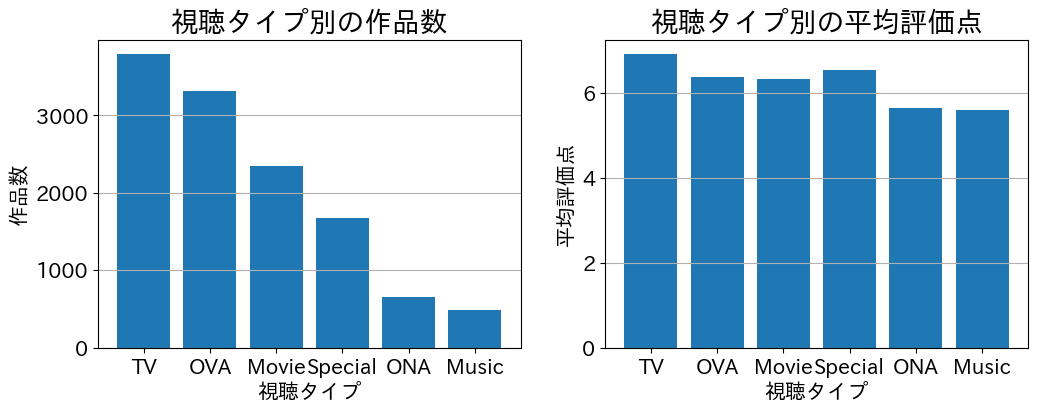

In [19]:
# 作図に必要なライブラリのインポート
import matplotlib.pyplot as plt # グラフ作成のためにインポート
import japanize_matplotlib      # グラフで日本語を使用するためにインポート
%matplotlib inline  

# サブプロットを作成
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1行2列のサブプロット

# グラフ１：視聴方法別の作品数
anime_types = df_anime["視聴タイプ"].value_counts()         # データ取得
x = ["TV", "OVA", "Movie", "Special", "ONA", "Music"]  # x軸はカテゴリ（指定された順序）
y = anime_types[x]
axes[0].bar(x, y)
axes[0].set_title("視聴タイプ別の作品数", fontsize=20) # タイトルを追加（フォントサイズ指定）
axes[0].set_xlabel("視聴タイプ", fontsize=15)          # x軸のラベルを追加（フォントサイズ指定）
axes[0].set_ylabel("作品数", fontsize=15)            # y軸のラベルを追加（フォントサイズ指定）
axes[0].tick_params(axis="x", labelsize=15)          # x軸の目盛のフォントサイズ変更
axes[0].tick_params(axis="y", labelsize=15)          # y軸の目盛のフォントサイズ変更
axes[0].grid(axis="y")

# グラフ２：視聴方法別の作品数
type_mean = df_anime.groupby("視聴タイプ")["平均評価点"].mean() # データ取得
y = type_mean[x]                                      # y軸は値
axes[1].bar(x, y)
axes[1].set_title("視聴タイプ別の平均評価点", fontsize=20) # タイトルを追加（フォントサイズ指定）
axes[1].set_xlabel("視聴タイプ", fontsize=15)            # x軸のラベルを追加（フォントサイズ指定）
axes[1].set_ylabel("平均評価点", fontsize=15)            # y軸のラベルを追加（フォントサイズ指定）
axes[1].tick_params(axis="x", labelsize=15)              # x軸の目盛のフォントサイズ変更
axes[1].tick_params(axis="y", labelsize=15)              # y軸の目盛のフォントサイズ変更
axes[1].grid(axis="y")

----

# レコメンドシステムの構築

## 視聴タイプの設定
- サンプル数の最大値は制限（1万件など）

In [20]:
# データ抽出
#anime_type      = "ONA"
#anime_type      = "Movie"
anime_type      = "TV"
df_anime_byType = df_anime[df_anime["視聴タイプ"]==anime_type]
display(df_anime_byType)

# データフレーム結合
df_user_byType = pd.merge(df_user,df_anime_byType,on="作品番号")

#欠損値があるデータ以外を抽出
df_user_byType = df_user_byType[df_user_byType["ユーザー評価点"] != -1]

# サンプル数の制限
sample = 7813737
if(len(df_user_byType) > sample):
    df_user_byType = df_user_byType.sample(n=sample, random_state=0)

# 表示
display(df_user_byType)

作品番号                        タイトル  \
1       5114  鋼の錬金術師 FULLMETAL ALCHEMIST   
2      28977                         銀魂°   
3       9253                  シュタインズ・ゲート   
4       9969               Gintama&#039;   
5      32935     ハイキュー!! 烏野高校 VS 白鳥沢学園高校   
...      ...                         ...   
11104  34522          Wake Up, Girls！ 新章   
11106  34467                     闇芝居 第4期   
11107  32615                        幼女戦記   
11110  34284         結城友奈は勇者である -鷲尾須美の章-   
11111  34445           結城友奈は勇者である -勇者の章-   

                                                    ジャンル 視聴タイプ    エピソード  \
1      Action, Adventure, Drama, Fantasy, Magic, Mili...    TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...    TV       51   
3                                       Sci-Fi, Thriller    TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...    TV       51   
5                 Comedy, Drama, School, Shounen, Sports    TV       10   
...                                                  ...   ...      ...   
11104                                       Drama, Music    TV  Unknown   
11106                     Dementia, Horror, Supernatural    TV  Unknown   
11107                                    Magic, Military    TV  Unknown   
11110               Drama, Fantasy, Magic, Slice of Life    TV        6   
11111               Drama, Fantasy, Magic, Slice of Life    TV        6   

       平均評価点   メンバー数  
1       9.26  793665  
2       9.25  114262  
3       9.17  673572  
4       9.16  151266  
5       9.15   93351  
...      ...     ...  
11104    NaN     381  
11106    NaN    1838  
11107    NaN    6652  
11110    NaN    2593  
11111    NaN    4439  

[3787 rows x 7 columns]

ユーザーID   作品番号  ユーザー評価点                       タイトル  \
1             3     20        8               NARUTO -ナルト-   
2             5     20        6               NARUTO -ナルト-   
5            21     20        8               NARUTO -ナルト-   
6            28     20        9               NARUTO -ナルト-   
7            34     20        9               NARUTO -ナルト-   
...         ...    ...      ...                        ...   
5283591   53492  31071        3  金曜日、阿部礼二：平均的なサラリーマンの異常な日常   
5283592   53492  31177        4                    野球部あるある   
5283593   53492  31237        5                がんばれ部 Next!   
5283594   53492  31464        3                     ぴちこ打球部   
5283595   62710  30173        8                    フルーティー侍   

                                                      ジャンル 視聴タイプ エピソード  平均評価点  \
1        Action, Comedy, Martial Arts, Shounen, Super P...    TV   220   7.81   
2        Action, Comedy, Martial Arts, Shounen, Super P...    TV   220   7.81   
5        Action, Comedy, Martial Arts, Shounen, Super P...    TV   220   7.81   
6        Action, Comedy, Martial Arts, Shounen, Super P...    TV   220   7.81   
7        Action, Comedy, Martial Arts, Shounen, Super P...    TV   220   7.81   
...                                                    ...   ...   ...    ...   
5283591                                             Comedy    TV     5   4.14   
5283592                                             Sports    TV     3   4.00   
5283593                                     Comedy, Sports    TV     6   5.36   
5283594                                     Comedy, Sports    TV    29   5.00   
5283595                Action, Comedy, Historical, Samurai    TV    13   5.52   

          メンバー数  
1        683297  
2        683297  
5        683297  
6        683297  
7        683297  
...         ...  
5283591     234  
5283592     149  
5283593      70  
5283594      39  
5283595     134  

[4364294 rows x 9 columns]

## ユーザー評価点のクロス集計表（ユーザー×作品）を作成
- 作品の抽出：X人以上が評価点を付けている作品（メジャー作品）
- ユーザーの抽出：Y作品以上評価点を付けているユーザー（様々な作品を視聴しているユーザー）

In [21]:
# クロス集計の作成
df_user_anime = df_user_byType.pivot_table(index   = "ユーザーID",      # 行方向
                                           columns = "作品番号",        # 列方向
                                           values  = "ユーザー評価点",) # セルに入る値

# ユーザーの選抜（Y作品以上評価点を付けているユーザー）
cnt_rating     = df_user_anime.T.count()                      # カウント
cnt_rating_id  = cnt_rating[cnt_rating >= 10].index.to_list() # 10作品数以上評価点を付けているユーザーのIDのリスト
df_user_anime  = df_user_anime.loc[cnt_rating_id, :]
display(df_user_anime.head())

# 作品の選抜(X人以上が評価点を付けている作品)
cnt_user      = df_user_anime.count()                          # カウント
cnt_user_id   = cnt_user[cnt_user >= 10].index.to_list()       # 10人以上が評価点を付けている作品
df_user_anime = df_user_anime[cnt_user_id]
display(df_user_anime.head())

#欠損値(評価なし映画)に0を代入
df_user_anime = df_user_anime.fillna(0)
display(df_user_anime.head())


# ユーザー数と作品数を表示
print("ユーザー数:", df_user_anime.shape[0], "作品数:", df_user_anime.shape[1])

# 表示(background_gradientメソッドでグラデーションを適用)
cmap = 'YlGnBu'  # カラーマップの選択（他にも多くのカラーマップが利用可能）
# display(df_user_anime.style.background_gradient(cmap=cmap, axis=None, subset=None).format("{:.0f}"))

作品番号    1      6      7      8      15     16     17     18     19     20     \
ユーザーID                                                                         
3         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    8.0   
5         NaN    8.0    NaN    NaN    6.0    NaN    6.0    6.0    NaN    6.0   
7         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

作品番号    ...  33037  33046  33113  33222  33241  33274  33341  33394  33419  \
ユーザーID  ...                                                                  
3       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7       ...    NaN    NaN    NaN    NaN    NaN    NaN    7.0    NaN    NaN   
8       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

作品番号    33421  
ユーザーID         
3         NaN  
5         NaN  
7         NaN  
8         NaN  
11        NaN  

[5 rows x 3069 columns]

作品番号    1      6      7      8      15     16     17     18     19     20     \
ユーザーID                                                                         
3         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    8.0   
5         NaN    8.0    NaN    NaN    6.0    NaN    6.0    6.0    NaN    6.0   
7         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

作品番号    ...  33021  33028  33037  33046  33113  33222  33241  33341  33394  \
ユーザーID  ...                                                                  
3       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    7.0    NaN   
8       ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

作品番号    33421  
ユーザーID         
3         NaN  
5         NaN  
7         NaN  
8         NaN  
11        NaN  

[5 rows x 2542 columns]

作品番号    1      6      7      8      15     16     17     18     19     20     \
ユーザーID                                                                         
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    8.0   
5         0.0    8.0    0.0    0.0    6.0    0.0    6.0    6.0    0.0    6.0   
7         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

作品番号    ...  33021  33028  33037  33046  33113  33222  33241  33341  33394  \
ユーザーID  ...                                                                  
3       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    7.0    0.0   
8       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

作品番号    33421  
ユーザーID         
3         0.0  
5         0.0  
7         0.0  
8         0.0  
11        0.0  

[5 rows x 2542 columns]

ユーザー数: 52175 作品数: 2542


In [22]:
df_user_anime.head()

作品番号    1      6      7      8      15     16     17     18     19     20     \
ユーザーID                                                                         
3         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    8.0   
5         0.0    8.0    0.0    0.0    6.0    0.0    6.0    6.0    0.0    6.0   
7         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

作品番号    ...  33021  33028  33037  33046  33113  33222  33241  33341  33394  \
ユーザーID  ...                                                                  
3       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
7       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    7.0    0.0   
8       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

作品番号    33421  
ユーザーID         
3         0.0  
5         0.0  
7         0.0  
8         0.0  
11        0.0  

[5 rows x 2542 columns]

----

## ユーザー間の類似度表を作成（コサイン類似度）
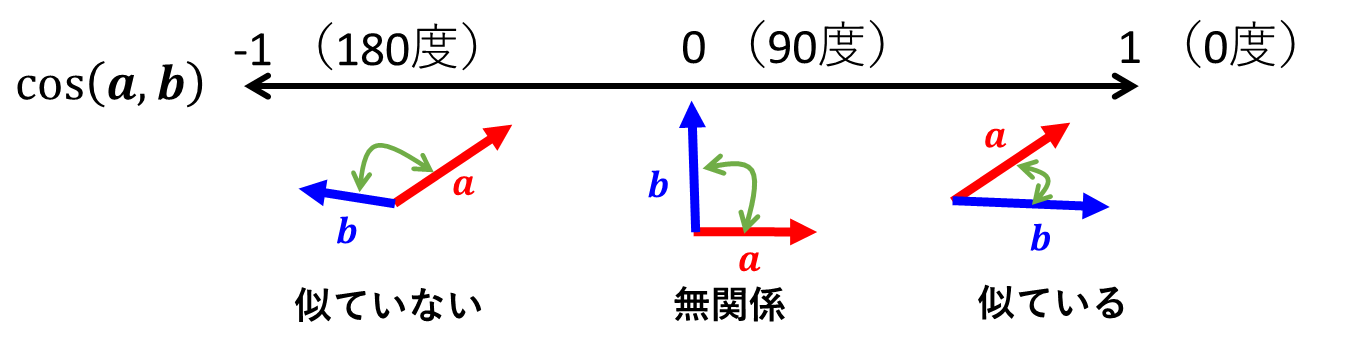

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import seaborn as sns

# コサイン類似度（行と行の間の類似度：ユーザー間の類似度）
user_user_sim = cosine_similarity(csr_matrix(df_user_anime))

# データフレームに挿入
df_sim = pd.DataFrame(user_user_sim,
                      index   = df_user_anime.index,
                      columns = df_user_anime.index)

# 表示(background_gradientメソッドでグラデーションを適用)
cmap = 'YlGnBu'  # カラーマップの選択（他にも多くのカラーマップが利用可能）
# display(df_sim.style.background_gradient(cmap=cmap, axis=None, subset=None).format("{:.2f}"))

# レコメンドシステムの利用

## 対象ユーザーの候補

In [10]:
import os
import pickle

# Create the dictionary object
dataframes = {
    'df_user': df_user,
    'df_anime': df_anime,
    'df_user_byType': df_user_byType,
    'df_user_anime': df_user_anime,
    'df_sim': df_sim
}

# Save the dictionary object to a pickle file
output_file = os.path.join(".", "dataframes.pickle")
with open(output_file, 'wb') as f:
    pickle.dump(dataframes, f)


In [11]:
import pickle

# Specify the path to the pickle file
pickle_file = "/home/kinoshita/recommend_anime/dataframes.pickle"

# Load the dataframes from the pickle file
with open(pickle_file, 'rb') as f:
    dataframes = pickle.load(f)

In [13]:
dataframes["df_sim"].shape

(52175, 52175)

In [14]:
df_user = dataframes['df_user']
df_anime = dataframes['df_anime']
df_user_byType = dataframes['df_user_byType']
df_user_anime = dataframes['df_user_anime']
df_sim = dataframes['df_sim']


In [20]:
import sys

# Define the object
obj = df_sim

# Get the size of the object
size = sys.getsizeof(obj) / (1024 ** 3)  # Convert to gigabytes

print("Size of the object:", size, "GB")


Size of the object: 20.284555844962597 GB


In [15]:
print("------------------------")
print("対象ユーザー数:",len(sorted(list(df_user_anime.index))))    
print("------------------------")
print(sorted(list(df_user_anime.index)))      

------------------------
対象ユーザー数: 52175
------------------------
[3, 5, 7, 8, 11, 12, 14, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 61, 62, 64, 65, 66, 68, 71, 73, 75, 77, 79, 80, 81, 84, 87, 88, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 134, 135, 139, 140, 141, 142, 144, 146, 147, 148, 149, 152, 153, 154, 155, 156, 158, 159, 160, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 189, 190, 191, 192, 194, 196, 200, 201, 202, 203, 204, 208, 209, 210, 211, 213, 214, 215, 216, 217, 219, 220, 222, 225, 226, 228, 230, 231, 232, 233, 234, 235, 236, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 255, 256, 258, 260, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 275, 276, 277, 278, 279, 280, 281, 282, 284, 286, 288, 

In [28]:
import matplotlib.pyplot as plt

# Get the titles as a list
titles = df_anime[df_anime["視聴タイプ"]=="TV"]["タイトル"].tolist()
# Open the txt file in write mode
with open("titles.txt", "w") as file:
    # Write each title to a new line in the txt file
    for title in titles:
        file.write(title + "\n")

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 10))

# # Set the font size and line spacing
# font_size = 12
# line_spacing = 1.5

# # Plot the titles as text
# for i, title in enumerate(titles):
#     ax.text(0.1, 0.9 - i * line_spacing, title, fontsize=font_size)

# # Remove the axis
# ax.axis("off")

# # Save the figure as a PDF file
# plt.savefig("titles.pdf", bbox_inches="tight")


In [29]:
import os
import pandas as pd

# Specify the folder path
folder_path = "日本語訳リスト"

# Get the list of CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Read each CSV file and store it as a dataframe
dataframes = {}
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes[file] = df

# Output the dataframes
for file, df in dataframes.items():
    print(f"Dataframe for {file}:")
    print(df)
    print()


Dataframe for anime_titles_translated_next_50.csv:
                       English Title              Japanese Title
0                     Kimi no Na wa.                       君の名は。
1   Fullmetal Alchemist: Brotherhood  鋼の錬金術師 FULLMETAL ALCHEMIST
2                           Gintama°                         銀魂°
3                        Steins;Gate                  シュタインズ・ゲート
4                      Gintama&#039;                         銀魂'
..                               ...                         ...
95     JoJo no Kimyou na Bouken (TV)                  ジョジョの奇妙な冒険
96        Mahou Shoujo Madoka★Magica                 魔法少女まどか☆マギカ
97                          Nichijou                          日常
98                       Psycho-Pass           PSYCHO-PASS サイコパス
99                         Barakamon                       ばらかもん

[100 rows x 2 columns]

Dataframe for anime_titles_translated (1).csv:
                                        English Title  \
0                                      K

## 対象ユーザーの選定
- 対象ユーザーが既に見た作品の抽出

In [16]:
#------------------------------------------
# 対象ユーザーID

targetID  = input('ユーザーIDを入力してください。')
targetID  = int(targetID) # 整数に変換

#targetID = 226 # Tokyo Ghoul
#targetID = 271 # Ore no Nounai Sentakushi ga, Gakuen Love Comedy wo Zenryoku de Jama Shiteiru
#targetID = 446 # Dragon Ball Z
#targetID = 670 # Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka
#targetID = 759 # Great Teacher Onizuka
#------------------------------------------

# 対象ユーザーが既に見た作品の抽出（元データのdf_user_byTypeを使用）
df_watched_byTarget = df_user_byType[df_user_byType["ユーザーID"]==targetID].sort_values(by=["ユーザー評価点","作品番号"], ascending=[False,True])
#display(df_watched_byTarget)

# 表示（特定の列の値に基づいてセルを色付け）
cmap = 'YlGnBu'  # カラーマップの選択（他にも多くのカラーマップが利用可能）
display(df_watched_byTarget.style.background_gradient(cmap=cmap, axis=None, subset=['ユーザー評価点']))

## 対象ユーザーと類似度の高いユーザーを抽出
- 上位X人

In [17]:
# 類似度の高い上位XのユーザーIDを取得
topX_user    = 10 # 上位X人
sim_users    = df_sim[targetID].sort_values(ascending=False)[1:topX_user+1]
df_sim_users = pd.DataFrame(sim_users) # シリーズ→データフレーム
df_sim_users.columns = ['類似度']      # 列名変更

# 高類似度ユーザーの類似度と評価値を結合
df_user_anime_sim = pd.merge(df_sim_users,df_user_anime,how="left",left_index=True, right_index=True)
#display(df_user_anime_sim)

# 高類似度ユーザーの評価値を更新（おすすめ度=類似度×評価点）
for i in df_user_anime_sim.columns.to_list():
    if i == "類似度":
        continue
    df_user_anime_sim[i]  = df_user_anime_sim["類似度"]*df_user_anime_sim[i]       # おすすめ度=評価点×類似度
    average_without_zeros = df_user_anime_sim[i][df_user_anime_sim[i] != 0].mean() # 0以外の値の平均値
    df_user_anime_sim.loc['おすすめ度',i] = average_without_zeros                  # おすすめ行を追加
#display(df_user_anime_sim)

# 表示（特定の列の値に基づいてセルを色付け）
cmap = 'YlGnBu'  # カラーマップの選択（他にも多くのカラーマップが利用可能）
display(df_user_anime_sim.style.background_gradient(cmap=cmap, axis=None, subset=['類似度']))

## 対象ユーザーにおすすめ作品を表示
- おすすめ度 = （各類似ユーザーの元の評価点×対象ユーザーとの類似度）の平均値

In [18]:
# 類似ユーザーの作品リストから対象ユーザーが既に評価した作品リストを除外
sim_cols    = df_user_anime_sim.drop(columns=["類似度"]).columns.to_list() # 類似ユーザーの作品リスト
target_cols = df_watched_byTarget["作品番号"].to_list()                    # 対象ユーザーが既に評価した作品リスト
diff_cols   = sorted(set(sim_cols) - set(target_cols))                     # 除外後の作品リスト

# おすすめ集計
topX_recommend = 10  # おすすめ上位X個の指定
df_recommend   = df_user_anime_sim[diff_cols]                   # 対象ユーザーが既に評価している作品を除外
df_recommend   = pd.DataFrame(df_recommend.loc["おすすめ度",:]) # おすすめ度抽出（シリーズ→データフレーム）         
df_recommend   = df_recommend.sort_values(by="おすすめ度", ascending=False).head(topX_recommend) # おすすめ上位X個を抽出 
df_recommend   = pd.merge(df_recommend,df_anime,how="left",left_index=True,right_on="作品番号")  # 映画情報と結合
df_recommend.index = range(1, len(df_recommend) + 1) # インデックスを順位に設定
df_recommend.index.name = "順位"                     # インデックス名を付ける

# 表示（特定の列の値に基づいてセルを色付け）
cmap = 'YlGnBu'  # カラーマップの選択（他にも多くのカラーマップが利用可能）
display(df_recommend.style.background_gradient(cmap=cmap, axis=None, subset=['おすすめ度']))

----

# 日本語化

In [15]:
import os
import json

# Specify the folder path
folder_path = "日本語訳リスト"

# Get the list of JSON files in the folder
json_files = [file for file in os.listdir(folder_path) if file.endswith(".json")]

# Create an empty list to store the combined data
combined_data = {}

# Read each JSON file and append its data to the combined_data list
for file in json_files:
    file_path = os.path.join(folder_path, file)
    with open(file_path, "r", encoding="utf-8") as f:
        try:
            data = json.load(f)
            combined_data = {**combined_data, **data}
        except:
            print("Error reading file:", file)
            continue

# Save the combined data as a new JSON file
output_file = "combined_data.json"
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(combined_data, f, ensure_ascii=False, indent=4)

print("Combined data saved as", output_file)


Combined data saved as combined_data.json


In [16]:
import json

# Specify the file path
file_path = "combined_data.json"

# Read the JSON file
with open(file_path, "r") as f:
    combined_data = json.load(f)


In [17]:
# Iterate over each row in df_anime
for index, row in df_anime.iterrows():
    title = row['タイトル']
    if title in combined_data:
        translated_title = combined_data[title]
        df_anime.at[index, 'タイトル'] = translated_title


In [18]:
df_anime[df_anime["視聴タイプ"]=="TV"]["タイトル"]

1        鋼の錬金術師 FULLMETAL ALCHEMIST
2                               銀魂°
3                        シュタインズ・ゲート
4                     Gintama&#039;
5           ハイキュー!! 烏野高校 VS 白鳥沢学園高校
                    ...            
11104            Wake Up, Girls！ 新章
11106                       闇芝居 第4期
11107                          幼女戦記
11110           結城友奈は勇者である -鷲尾須美の章-
11111             結城友奈は勇者である -勇者の章-
Name: タイトル, Length: 3787, dtype: object